# Mall Customer Segmentation Data Analysis and Using K-Means Clustering

In [1]:
import pandas as pd # It is used for data processing 
import numpy as np # It is used for linear algebra (if requied)
import seaborn as sns # It is used for data visualization 
import matplotlib.pyplot as plt
%matplotlib inline

#### Using Pandas we will easily read the CSV file and store in Customer DataFrame 

In [2]:
Customer = pd.read_csv('Mall_Customers.csv')

#### Showing the first 10 records  

In [3]:
Customer.head(10)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

#### Showing the last 10 records  

In [4]:
Customer.tail(10)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
190         191  Female   34                 103                      23
191         192  Female   32                 103                      69
192         193    Male   33                 113                       8
193         194  Female   38                 113                      91
194         195  Female   47                 120                      16
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

In [5]:
Customer.shape

(200, 5)

In [6]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
Customer.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

#### Checking the Null values 

In [8]:
Customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Set Customer ID as a Index of the Customer DataFrame 

In [9]:
Customer.set_index('CustomerID',inplace=True)

In [10]:
Customer.head(5)

Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40

### Exploratory Data Analysis  

#### Here We are creating the Distribution Plots for Age, Annual Income, Spending Score

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

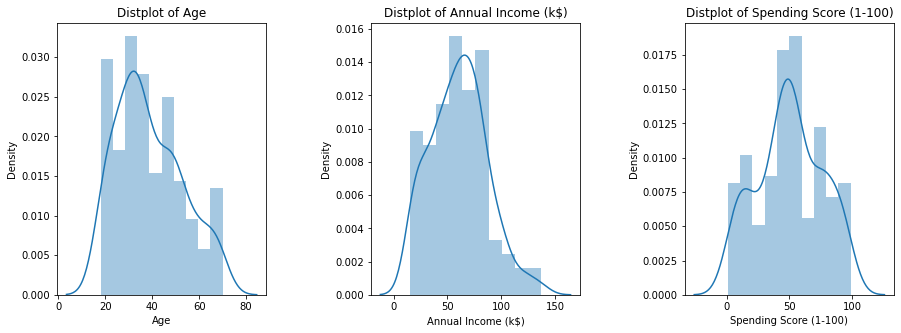

In [11]:
def distplot(cols):
    plt.figure(1 , figsize = (15,5))
    n = 0
    for i in cols:
        n +=1
        plt.subplot(1,3,n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.title('Distplot of {0}'.format(i))
        sns.distplot(Customer[i],bins=10)
    plt.show()
distplot(['Age','Annual Income (k$)', 'Spending Score (1-100)'])

#### Use a cataplot to compare males and females for age  

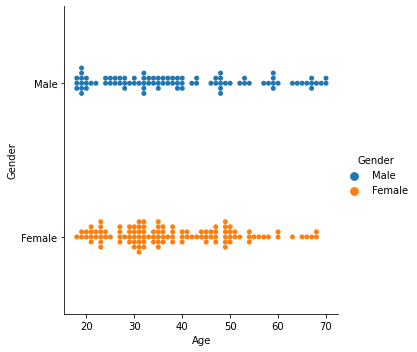

In [12]:
sns.catplot(data=Customer,x='Age',y='Gender',hue="Gender", kind="swarm")

#### Use a cataplot to compare males and females for Annual Income

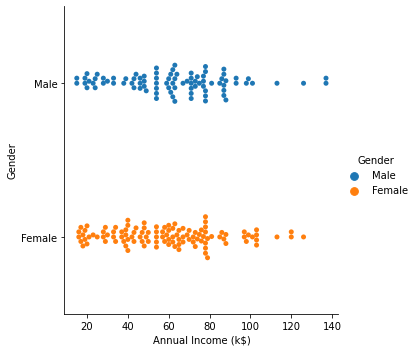

In [13]:
sns.catplot(data=Customer,x='Annual Income (k$)',y='Gender',hue="Gender", kind="swarm")

####  Use a cataplot to compare males and females for Spending Score

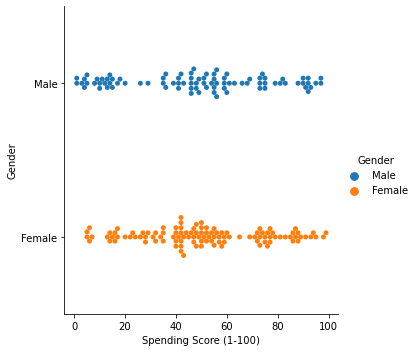

In [14]:
sns.catplot(data=Customer,x='Spending Score (1-100)',y='Gender',hue="Gender", kind="swarm")

#### We are counting males and females using counterplot

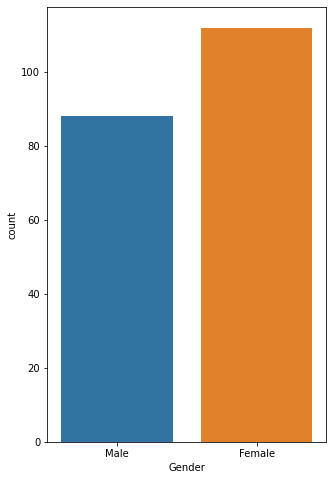

In [15]:
plt.figure(1,figsize=(5,8))
sns.countplot(x='Gender',data=Customer)
plt.show()

#### Here We are creating the violinplot Plots to compare males and females for Age, Annual Income, Spending Score 

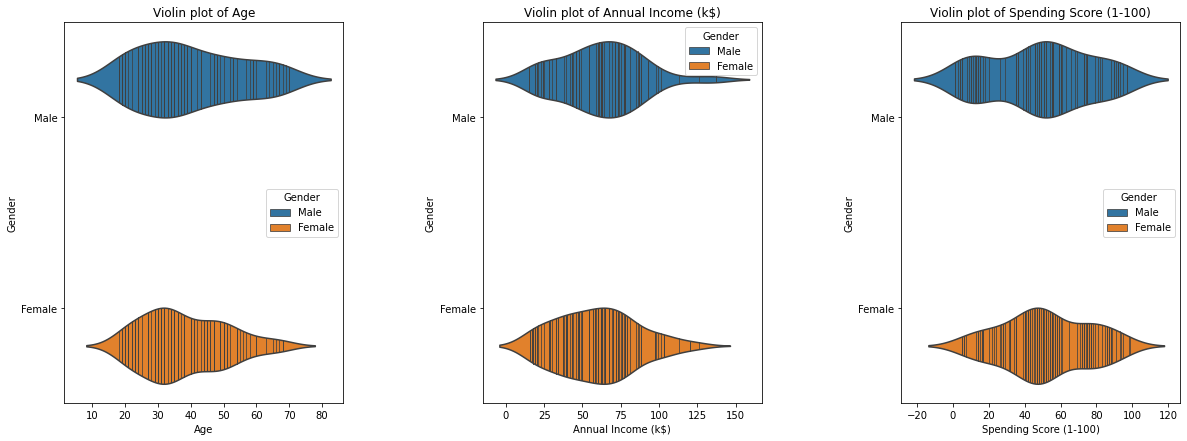

In [16]:
def violinplot(cols):
    plt.figure(1 , figsize = (20,7))
    n = 0
    for i in cols:
        n +=1
        plt.subplot(1,3,n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.title('Violin plot of {0}'.format(i))
        sns.violinplot(x=i,y='Gender',data=Customer, hue='Gender', inner="stick")
    plt.show()
violinplot(['Age','Annual Income (k$)', 'Spending Score (1-100)'])

#### Here we are distributing the customers by the age groups  

In [17]:
def age_distribution():
    min_age = Customer['Age'].min()
    age_18_25 = Customer.Age[(Customer.Age >=min_age) & (Customer.Age<=25)]
    age_26_40 = Customer.Age[(Customer.Age >=26) & (Customer.Age<=40)]
    age_41_55 = Customer.Age[(Customer.Age >=41) & (Customer.Age<=55)]
    age_56_65 = Customer.Age[(Customer.Age >=56) & (Customer.Age<=65)]
    age_66_above = Customer.Age[(Customer.Age >=66)]
    
    age_diff = ["18-25","26-40","41-55","56-65","65+"]
    total_Cust = [len(age_18_25),len(age_26_40),len(age_41_55),len(age_56_65),len(age_66_above)]

    return age_diff,total_Cust
    

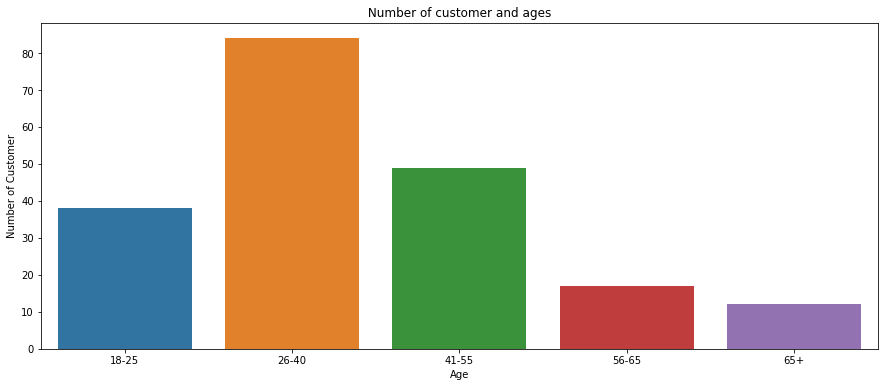

In [18]:
agex,agey = age_distribution()
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey)
plt.title(' Number of customer and ages ')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

#### Using a relplot to compare the Annual Income and Spending Score columns. 

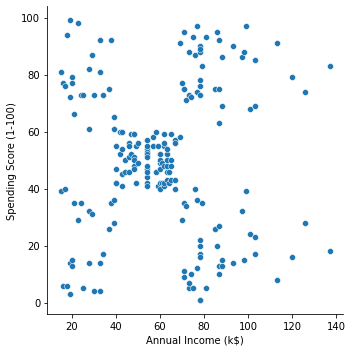

In [19]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=Customer)

#### Using a jointplot to create a 2D hex bin plot comparing Annual Income and Spending Score 

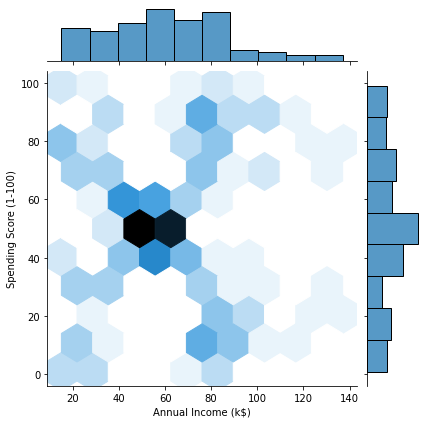

In [20]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=Customer,kind='hex')

#### Here we are distributing the customer by spending score

In [21]:
def Spending_Score_distribution():
    min_spend = Customer['Spending Score (1-100)'].min()
    spend_1_20 = Customer['Spending Score (1-100)'][(Customer['Spending Score (1-100)'] >=min_spend) & (Customer['Spending Score (1-100)']<=20)]
    spend_21_40 = Customer['Spending Score (1-100)'][(Customer['Spending Score (1-100)'] >=21) & (Customer['Spending Score (1-100)']<=40)]
    spend_41_60 = Customer['Spending Score (1-100)'][(Customer['Spending Score (1-100)'] >=41) & (Customer['Spending Score (1-100)']<=60)]
    spend_61_80 = Customer['Spending Score (1-100)'][(Customer['Spending Score (1-100)'] >=61) & (Customer['Spending Score (1-100)']<=80)]
    spend_81_100 = Customer['Spending Score (1-100)'][(Customer['Spending Score (1-100)'] >=81) & (Customer['Spending Score (1-100)']<=100)]
    
    spend_x = ['1-20','21-40','41-60','61-80','81-100']
    spend_y = [len(spend_1_20),len(spend_21_40),len(spend_41_60),len(spend_61_80),len(spend_81_100)]
    
    return spend_x,spend_y

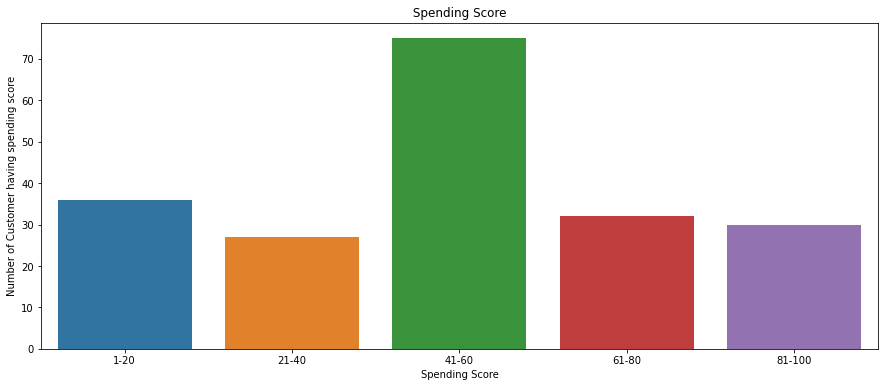

In [22]:
spend_x,spend_y = Spending_Score_distribution()
plt.figure(figsize=(15,6))
sns.barplot(x=spend_x,y=spend_y)
plt.title(' Spending Score ')
plt.xlabel('Spending Score')
plt.ylabel('Number of Customer having spending score')
plt.show()

#### Here we are distributing the customer by annual score

In [23]:
def Annual_score_distribution():
    min_Annual = Customer['Annual Income (k$)'].min()
    Annual_min_30 = Customer['Annual Income (k$)'][(Customer['Annual Income (k$)'] >=min_Annual) & (Customer['Annual Income (k$)']<=30)]
    Annual_31_60 = Customer['Annual Income (k$)'][(Customer['Annual Income (k$)'] >=31) & (Customer['Annual Income (k$)']<=60)]
    Annual_61_90 = Customer['Annual Income (k$)'][(Customer['Annual Income (k$)'] >=61) & (Customer['Annual Income (k$)']<=90)]
    Annual_91_120 = Customer['Annual Income (k$)'][(Customer['Annual Income (k$)'] >=91) & (Customer['Annual Income (k$)']<=120)]
    Annual_121_150 = Customer['Annual Income (k$)'][(Customer['Annual Income (k$)'] >=121) & (Customer['Annual Income (k$)']<=150)]
    
    Annual_x = ['(1-30,000)$','(31,000-60,000)$','(61,000-90,000)$','(91,000-120,000)$','(121,000-150,000)$']
    Annual_y = [len(Annual_min_30),len(Annual_31_60),len(Annual_61_90),len(Annual_91_120),len(Annual_121_150)]

    return Annual_x,Annual_y

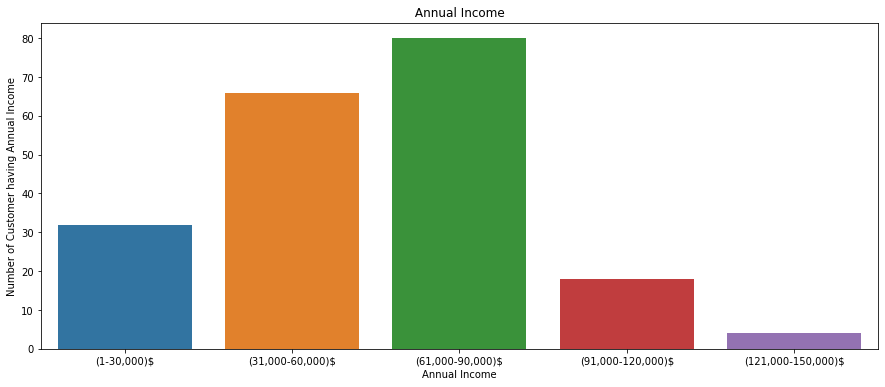

In [24]:
Annual_x,Annual_y = Annual_score_distribution()
plt.figure(figsize=(15,6))
sns.barplot(x=Annual_x,y=Annual_y)
plt.title(' Annual Income ')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customer having Annual Income')
plt.show()

#### Using heatmap we are trying to show the correlation 

<AxesSubplot:>

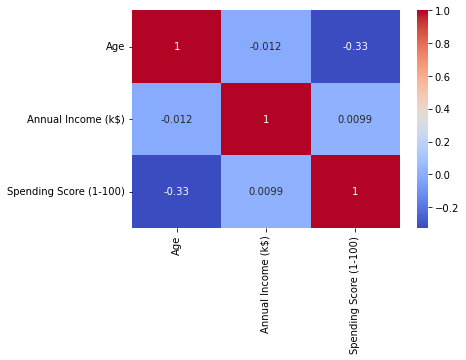

In [25]:
corr = Customer.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

#### Using the boxplots we try to find the outlier 

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

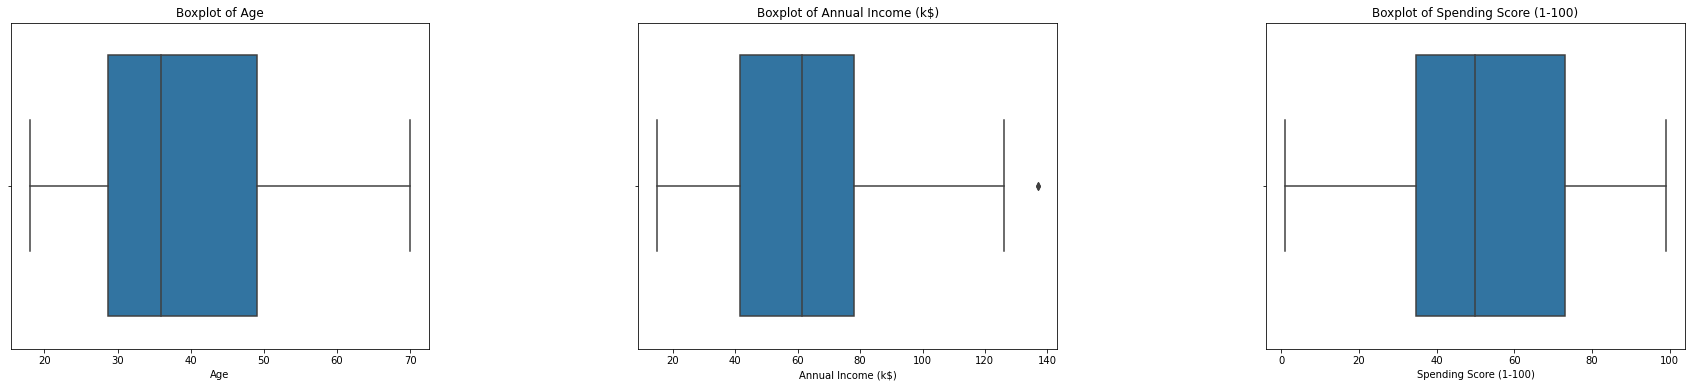

In [28]:
def boxplot(cols):
    plt.figure(1 , figsize = (30,6))
    n = 0
    for i in cols:
        n +=1
        plt.subplot(1,3,n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.title('Boxplot of {0}'.format(i))
        sns.boxplot(Customer[i])
    plt.show()
boxplot(['Age','Annual Income (k$)', 'Spending Score (1-100)'])

#### Here we will detecting the outliers and try to remove those outliers 

Age -> mini -> -1.625, maxi -> 79.375, Q1 -> 28.75, medain -> 36.0, Q3 -> 49.0, irq -> 20.25 

Annual Income (k$) -> mini -> -13.25, maxi -> 132.75, Q1 -> 41.5, medain -> 61.5, Q3 -> 78.0, irq -> 36.5 

Spending Score (1-100) -> mini -> -22.625, maxi -> 130.375, Q1 -> 34.75, medain -> 50.0, Q3 -> 73.0, irq -> 38.25 



C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

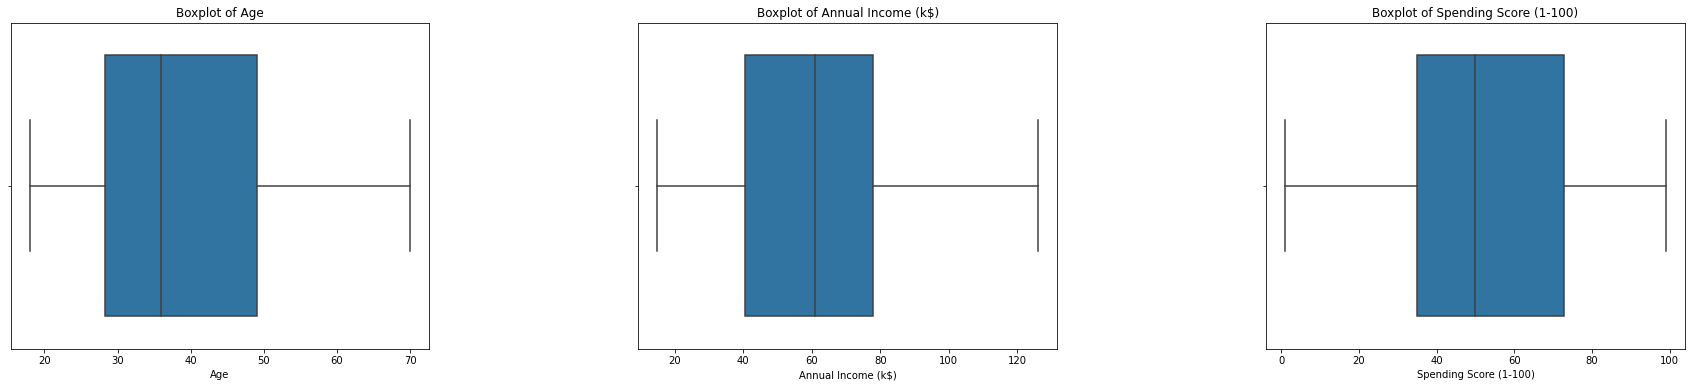

In [29]:
def detect_outlier(data,col):
    outliers = []
    for i in col:
        Q1 = data[i].quantile(0.25)
        Q2 = data[i].quantile(0.5)
        Q3 = data[i].quantile(0.75)
        iqr = Q3 - Q1
        mini = Q1 - 1.5 * iqr
        maxi = Q3 + 1.5 * iqr
        print(f"{i} -> mini -> {mini}, maxi -> {maxi}, Q1 -> {Q1}, medain -> {Q2}, Q3 -> {Q3}, irq -> {iqr} \n")
        outliers.extend(list(data[i].index[(data[i] > maxi) | (data[i] < mini)]))
    return outliers
        
def outliers_remover(data,outliers):
    data.drop(set(outliers),inplace=True)
    return data

ind = detect_outlier(Customer.iloc[:,1:4],list(Customer.iloc[:,1:4].columns))
Customer = outliers_remover(Customer,ind)
boxplot(['Age','Annual Income (k$)', 'Spending Score (1-100)'])

### Clustering using K- means   

#### 1: Segmentation using Age and Spending Score 

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


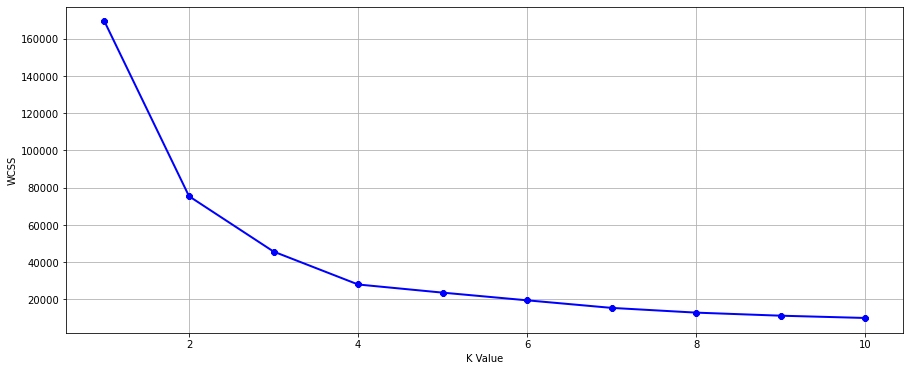

In [30]:
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans

X_data1 = Customer.loc[:,['Age','Spending Score (1-100)']]
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_data1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#### Using this function we will evaluate the performance metrics clustering-silhouetter coefficient 

In [31]:
def Silhouette(X_data3):
    import matplotlib.cm as cm
    n_clusters = [2,3,4,5,6,8,9,10,11]
    for n_cluster in n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X_data3) + (n_cluster + 1) * 10])
        clusterer = KMeans(n_clusters=n_cluster, random_state=10)
        cluster_labels = clusterer.fit_predict(X_data3)
        silhouette_avg = silhouette_score(X_data3, cluster_labels)
        print("For n_clusters =", n_cluster,
              "The average silhouette_score is :", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X_data3, cluster_labels)
        y_lower = 10
        for i in range(n_cluster):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
        ax2.scatter(X_data3.iloc[:, 0], X_data3.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
    #     # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_cluster),
                     fontsize=14, fontweight='bold')
    plt.show()

#### We are calling Performance Metrics Clustering-Silhouetter Coefficient Age, Spending Score (1-100)

For n_clusters = 2 The average silhouette_score is : 0.46695278354058783
For n_clusters = 3 The average silhouette_score is : 0.45167374340791117
For n_clusters = 4 The average silhouette_score is : 0.4982143018701353
For n_clusters = 5 The average silhouette_score is : 0.44404885879251726
For n_clusters = 6 The average silhouette_score is : 0.4466882343824717
For n_clusters = 8 The average silhouette_score is : 0.43720861238937636
For n_clusters = 9 The average silhouette_score is : 0.42323051476856444
For n_clusters = 10 The average silhouette_score is : 0.41419905780450245
For n_clusters = 11 The average silhouette_score is : 0.3892387857195798


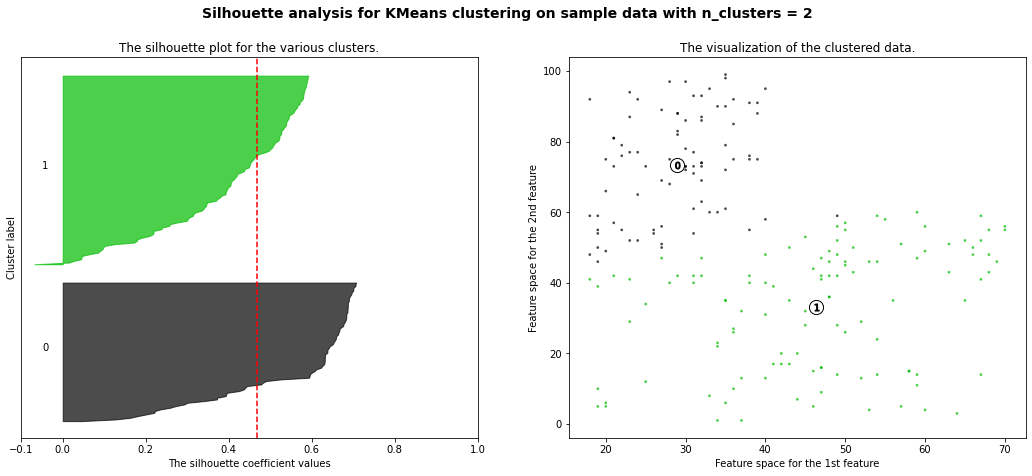

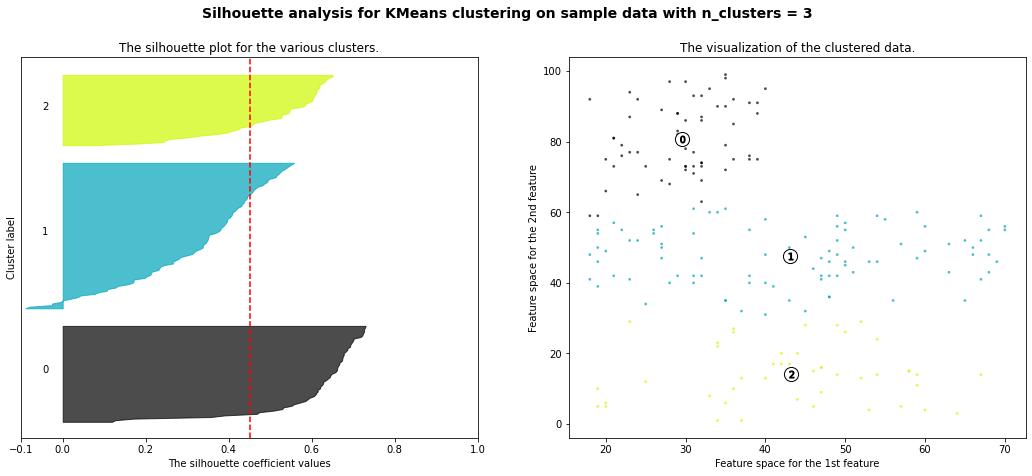

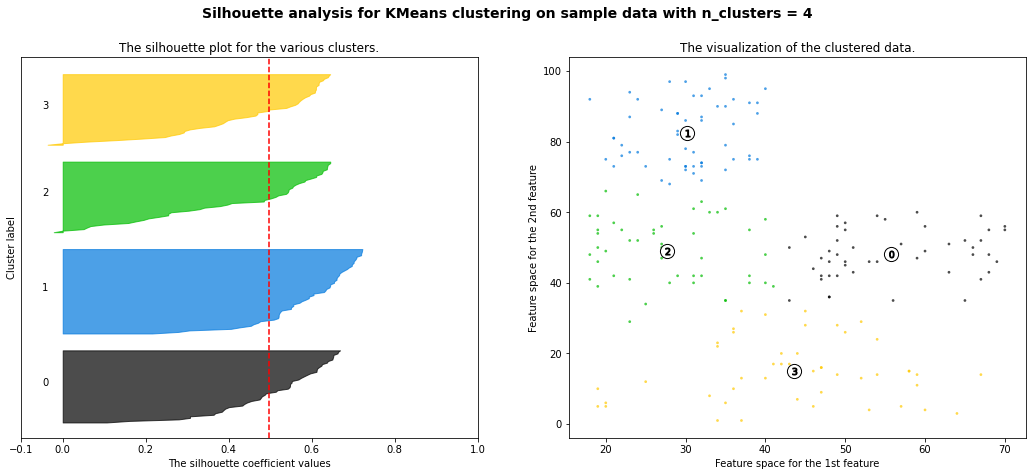

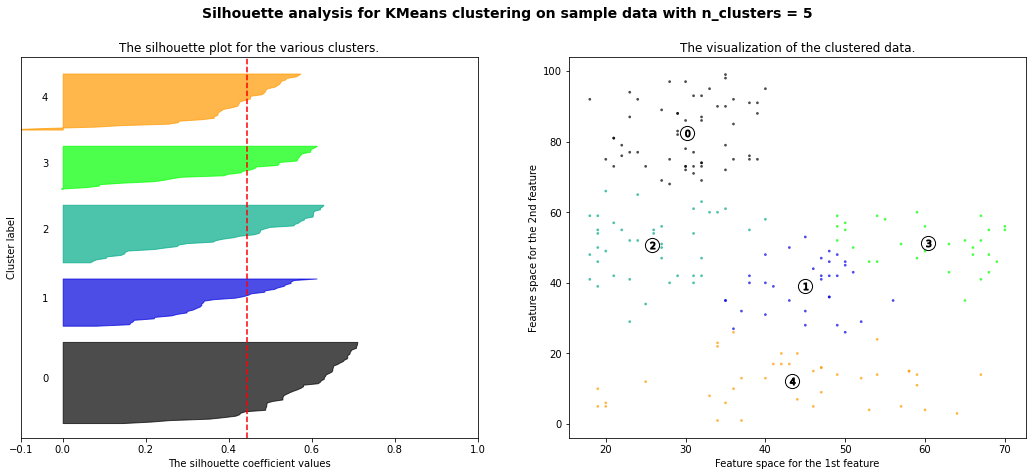

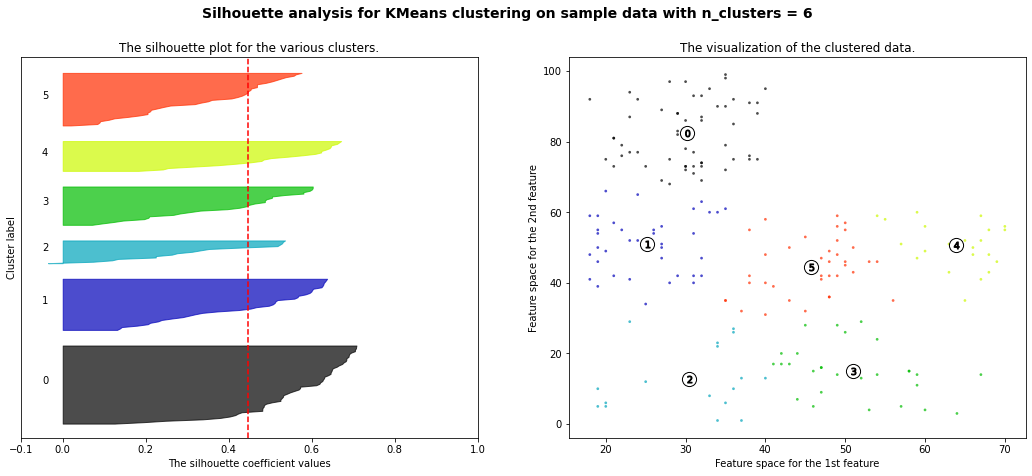

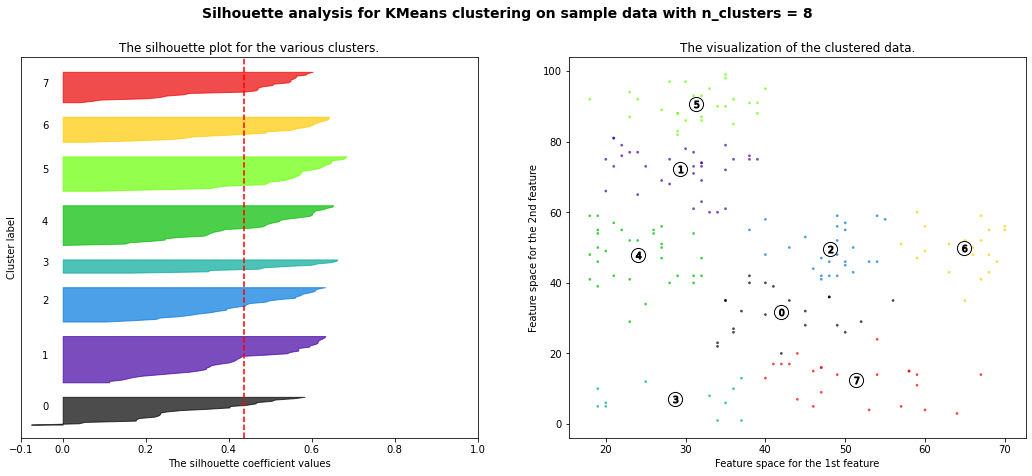

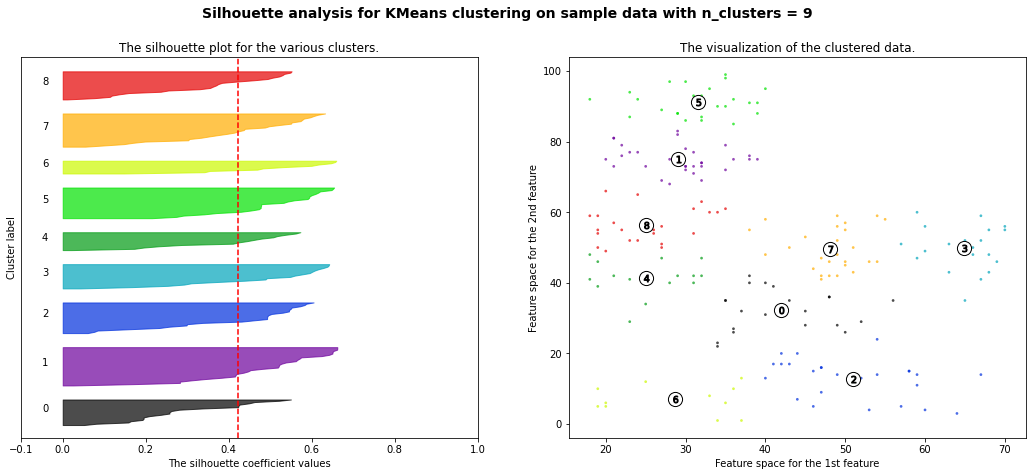

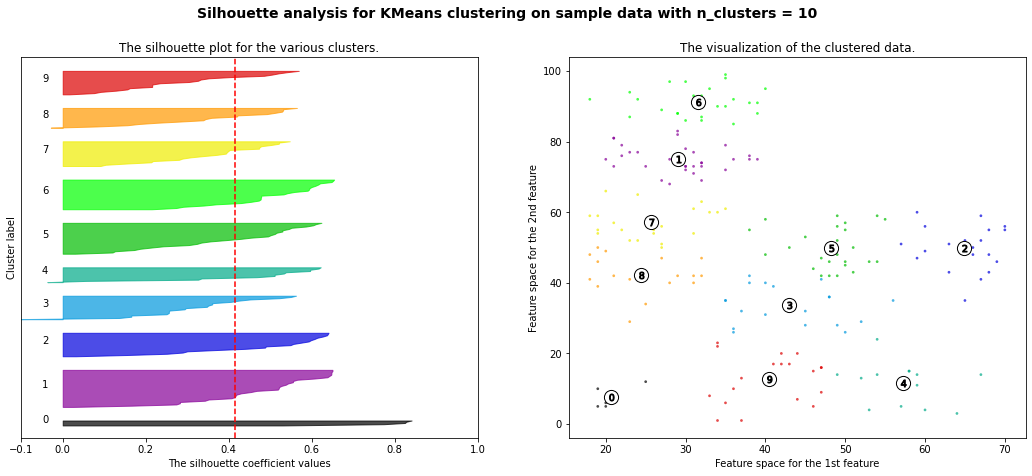

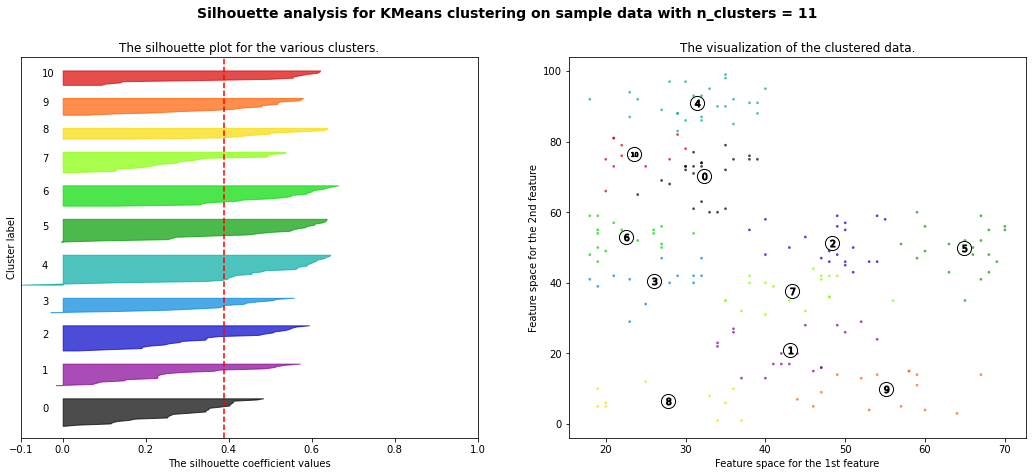

In [32]:
Silhouette(X_data1)

#### Looking at the above graph, we are selecting 4 clusters

In [33]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X_data1)
X_data1['label'] = label
print(label)

[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [34]:
print(kmeans.cluster_centers_)

[[43.53191489 14.95744681]
 [30.17857143 82.33928571]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]]


In [35]:
X_data1

Age  Spending Score (1-100)  label
CustomerID                                    
1            19                      39      2
2            21                      81      1
3            20                       6      0
4            23                      77      1
5            31                      40      2
...         ...                     ...    ...
194          38                      91      1
195          47                      16      0
196          35                      79      1
197          45                      28      0
198          32                      74      1

[198 rows x 3 columns]

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

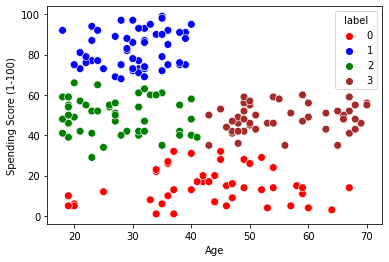

In [37]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=X_data1,palette=['red','blue','green','brown'],hue='label',s=60)

#### 2: Segmentation using Annual Income and Spending Score 

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


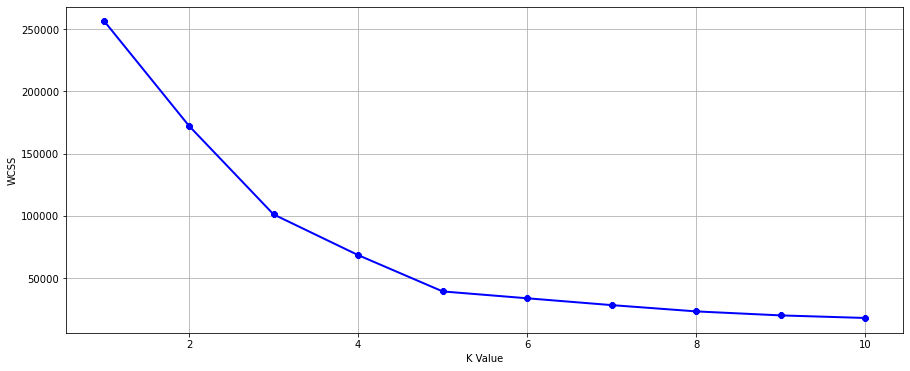

In [38]:
X_data2 = Customer.loc[:,['Annual Income (k$)','Spending Score (1-100)']]
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_data2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#### We are calling Performance Metrics Clustering-Silhouetter Coefficient for Annual Income (k$) and Spending Score (1-100)

For n_clusters = 2 The average silhouette_score is : 0.3219134777108001
For n_clusters = 3 The average silhouette_score is : 0.46541758070184547
For n_clusters = 4 The average silhouette_score is : 0.497441782578338
For n_clusters = 5 The average silhouette_score is : 0.5606825090788626
For n_clusters = 6 The average silhouette_score is : 0.4647693637883821
For n_clusters = 8 The average silhouette_score is : 0.45565992348694245
For n_clusters = 9 The average silhouette_score is : 0.45454114645963273
For n_clusters = 10 The average silhouette_score is : 0.4516385424717057
For n_clusters = 11 The average silhouette_score is : 0.4392072270067863


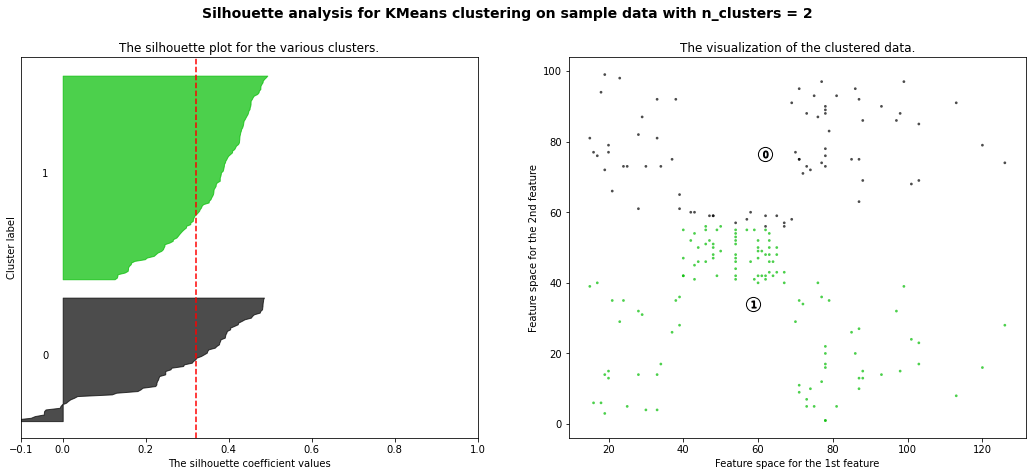

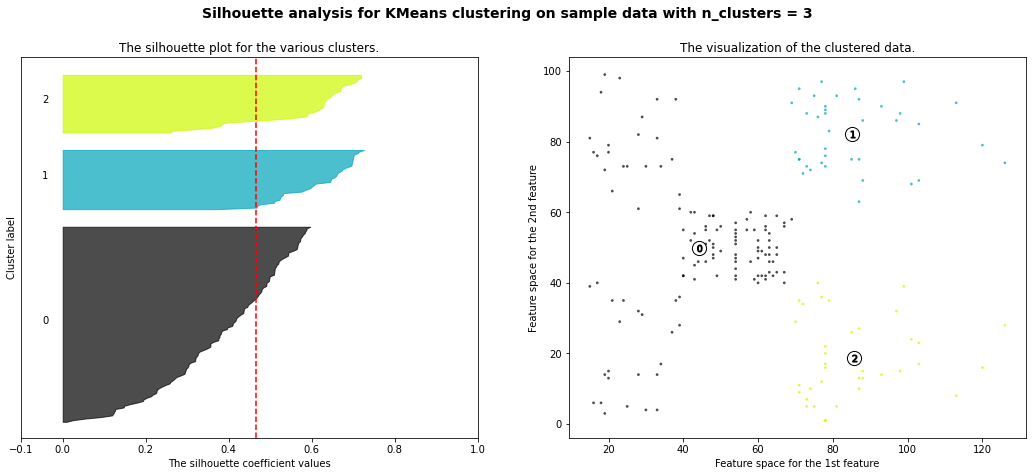

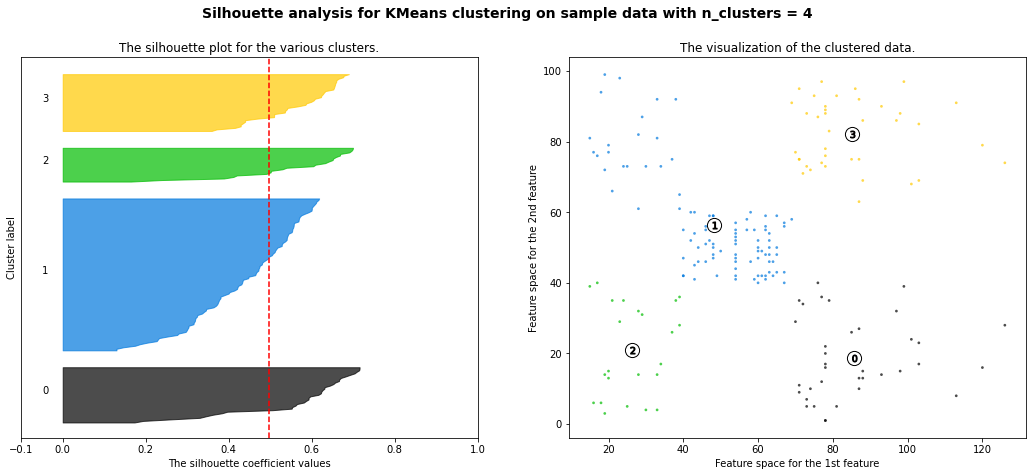

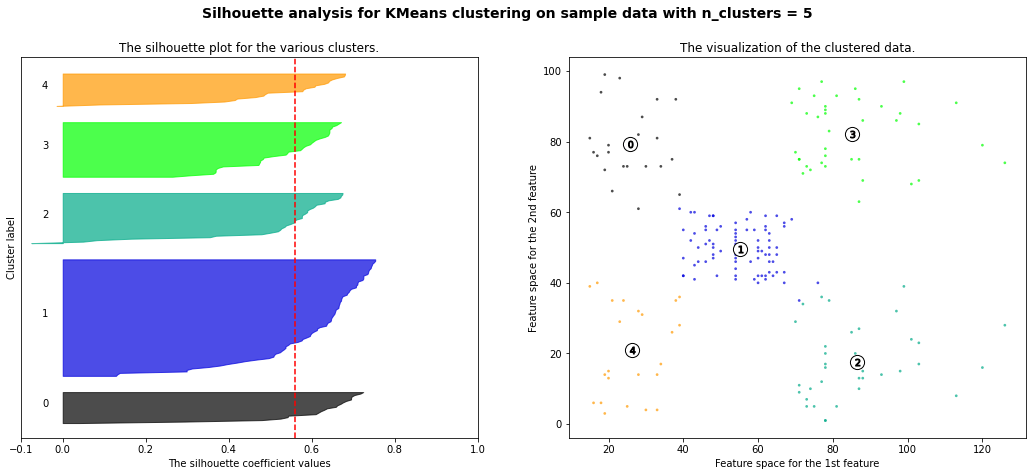

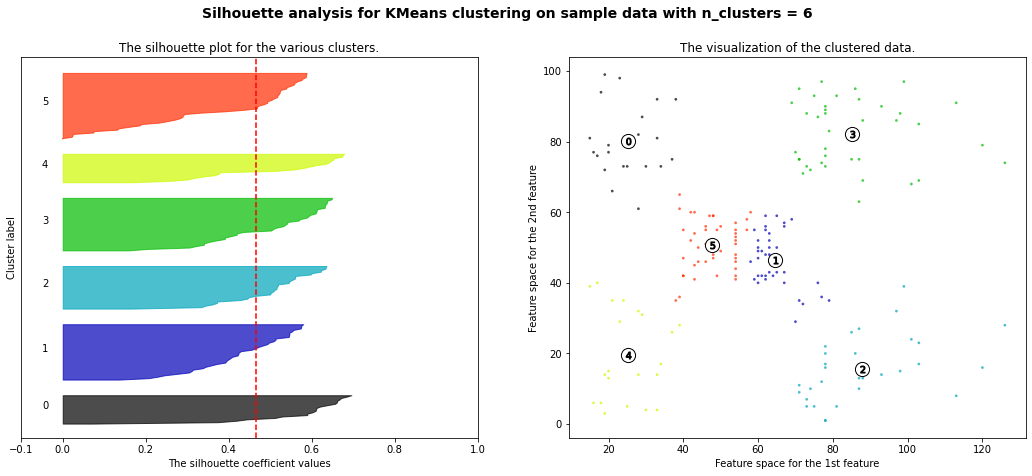

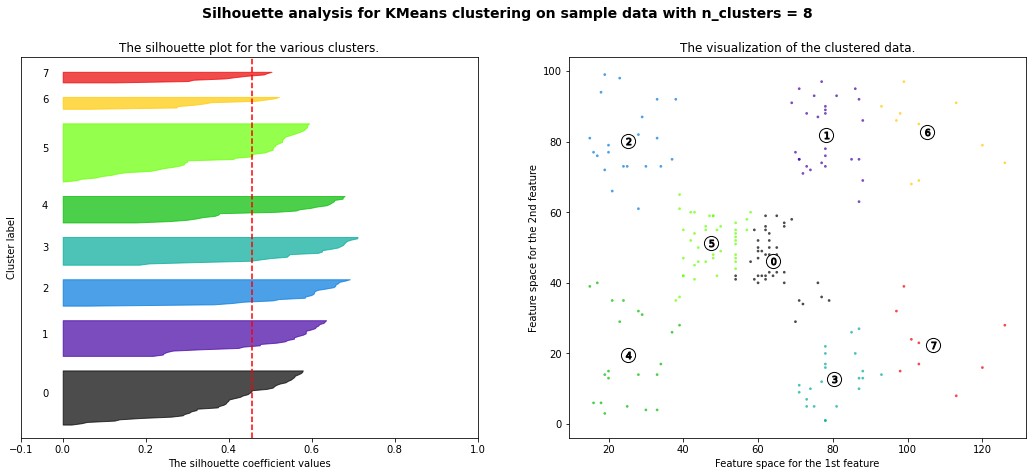

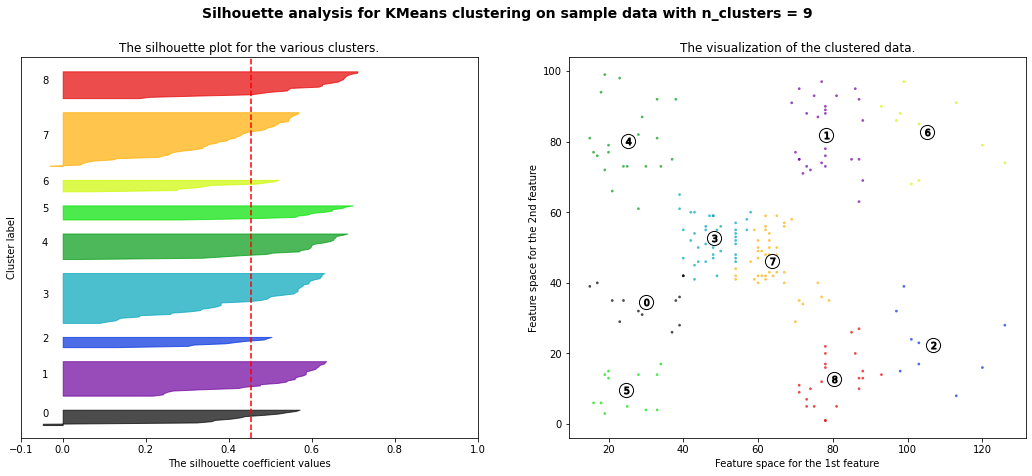

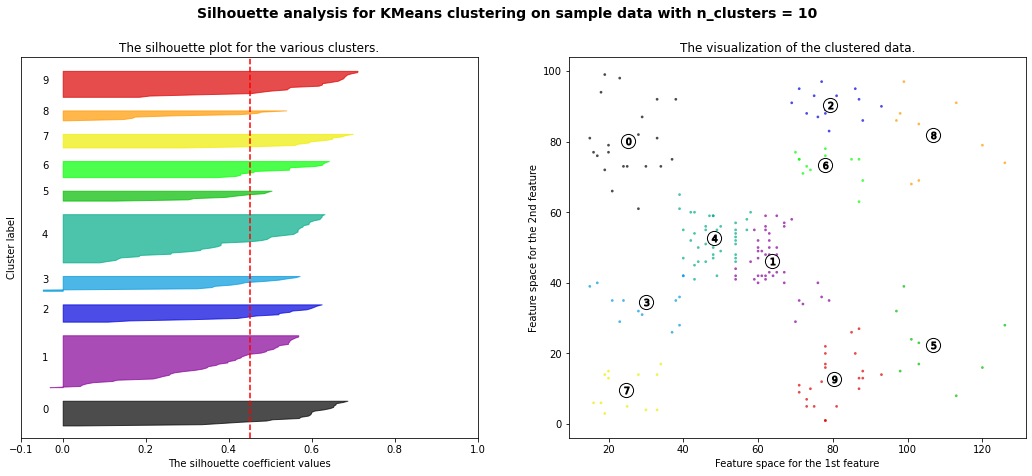

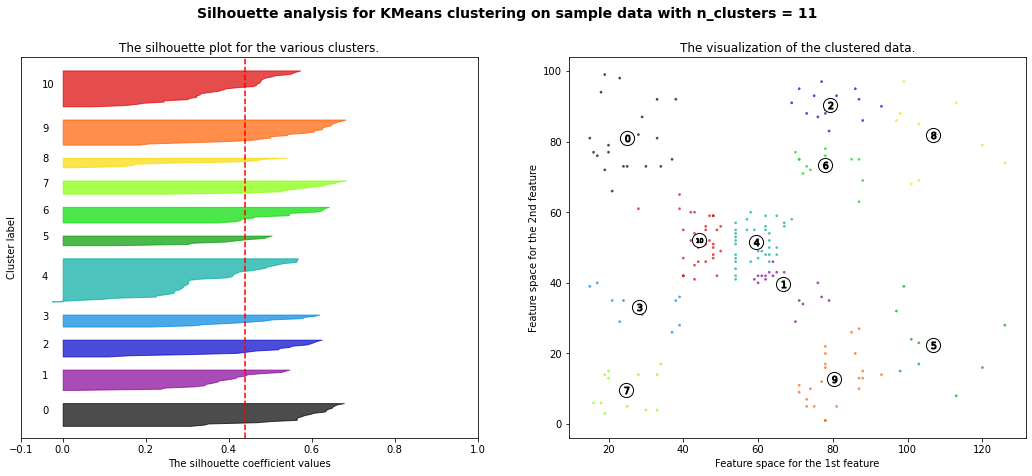

In [39]:
Silhouette(X_data2)

#### Looking at the above graph, we are selecting 5 clusters 

In [40]:
kmeans = KMeans(n_clusters=6)
label = kmeans.fit_predict(X_data2)
label

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 5, 3, 5, 5,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2])

In [41]:
print(kmeans.cluster_centers_)

[[25.14285714 19.52380952]
 [63.95238095 46.21428571]
 [85.21052632 82.10526316]
 [25.0952381  80.04761905]
 [87.87096774 15.51612903]
 [47.44444444 51.24444444]]


In [42]:
X_data2['label'] = label
X_data2.head(5)

Annual Income (k$)  Spending Score (1-100)  label
CustomerID                                                   
1                           15                      39      0
2                           15                      81      3
3                           16                       6      0
4                           16                      77      3
5                           17                      40      0

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

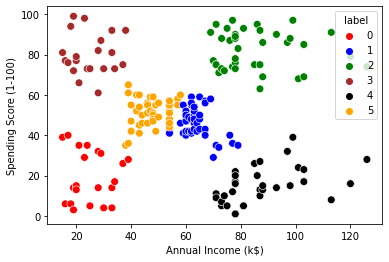

In [43]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=X_data2,palette=['red','blue','green','brown','black','orange'],hue='label',s=60)

#### 3: Segmentation using Age , Annual Income and Spending Score 

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


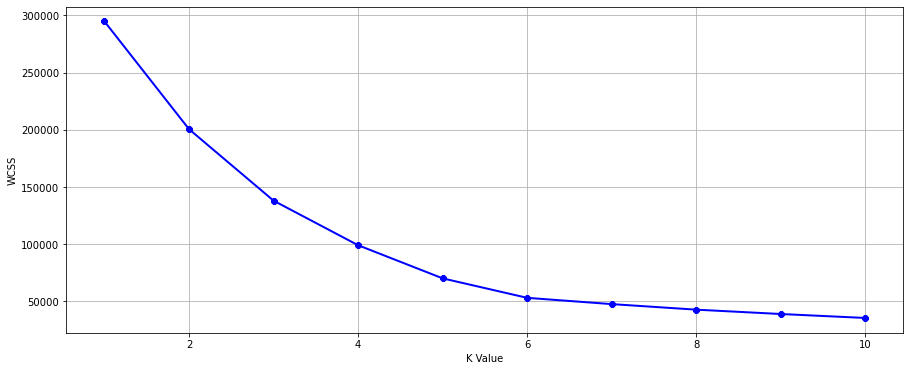

In [44]:
X_data3 = Customer.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']]
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_data3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#### We are calling Performance Metrics Clustering-Silhouetter Coefficient for  Age, Annual Income (k$), Spending Score (1-100)

For n_clusters = 2 The average silhouette_score is : 0.2966221199277427
For n_clusters = 3 The average silhouette_score is : 0.3794966083348183
For n_clusters = 4 The average silhouette_score is : 0.40775328174434056
For n_clusters = 5 The average silhouette_score is : 0.44863190451683665
For n_clusters = 6 The average silhouette_score is : 0.45984228955477996
For n_clusters = 8 The average silhouette_score is : 0.41254795901691715
For n_clusters = 9 The average silhouette_score is : 0.38296691244122866
For n_clusters = 10 The average silhouette_score is : 0.36697508976355075
For n_clusters = 11 The average silhouette_score is : 0.3527999593118719


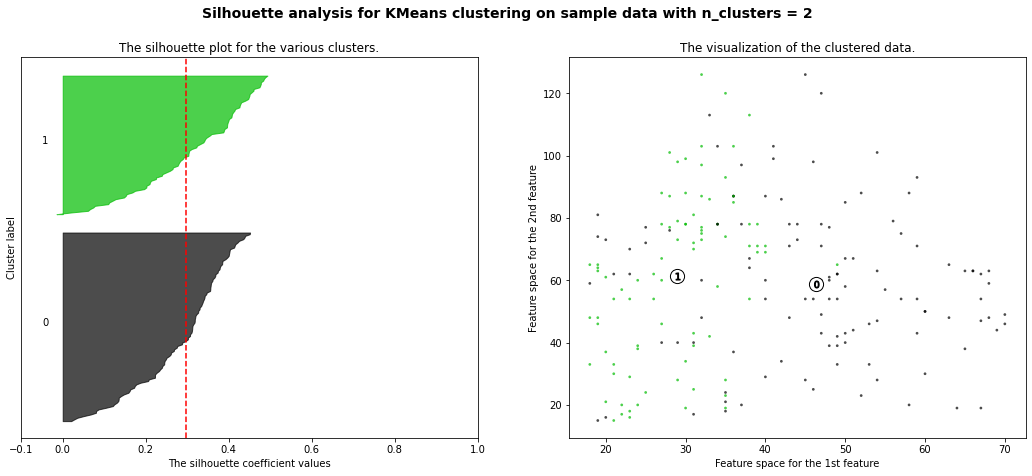

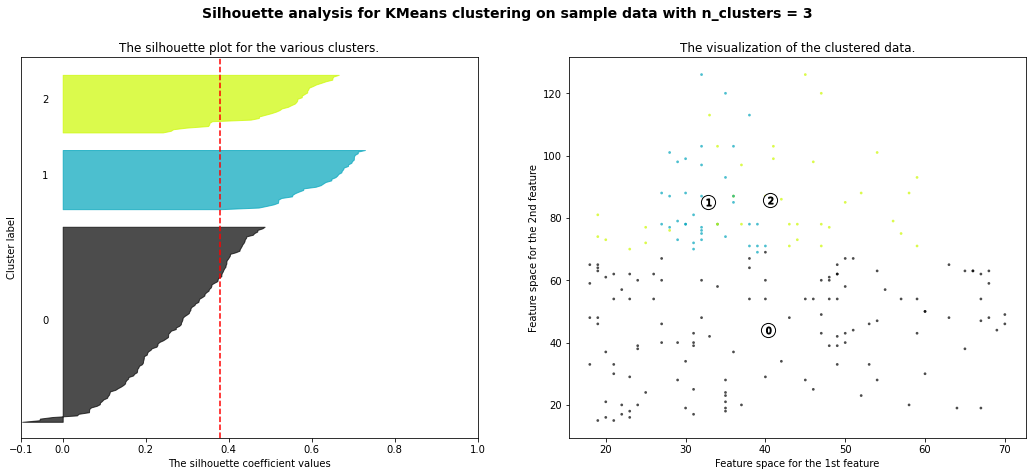

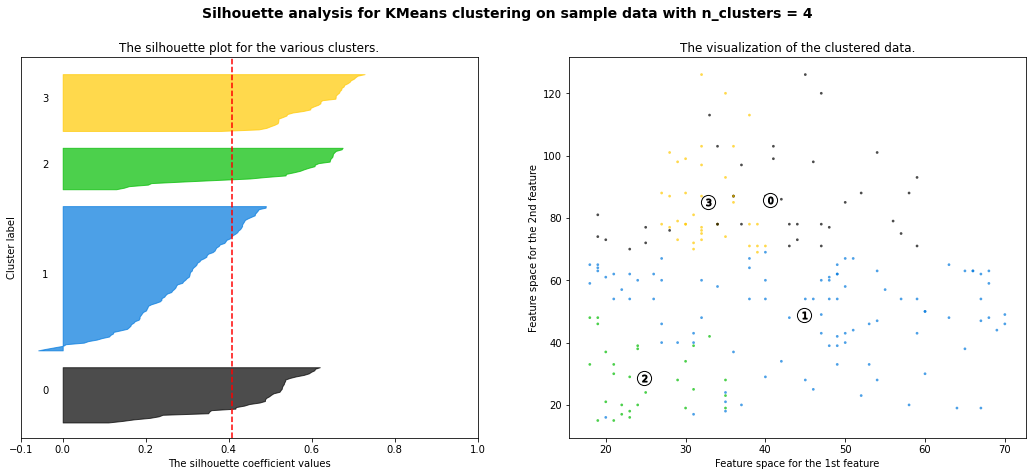

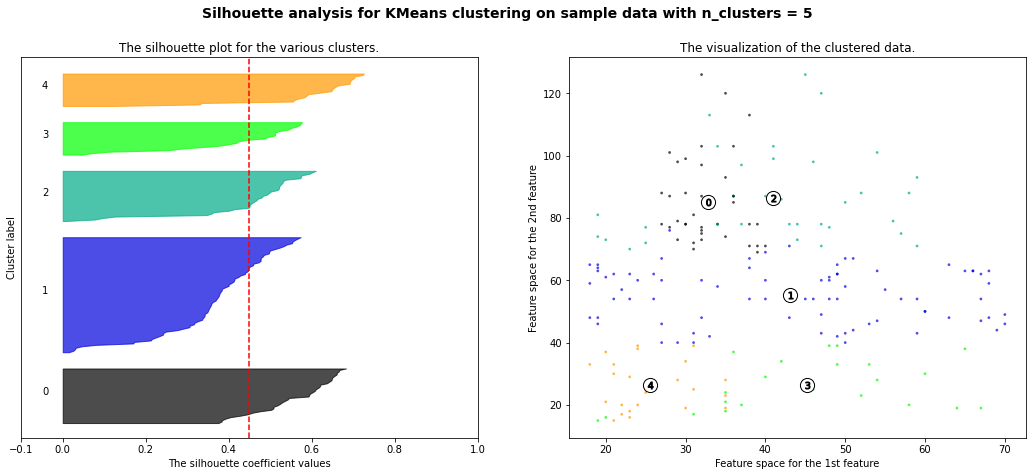

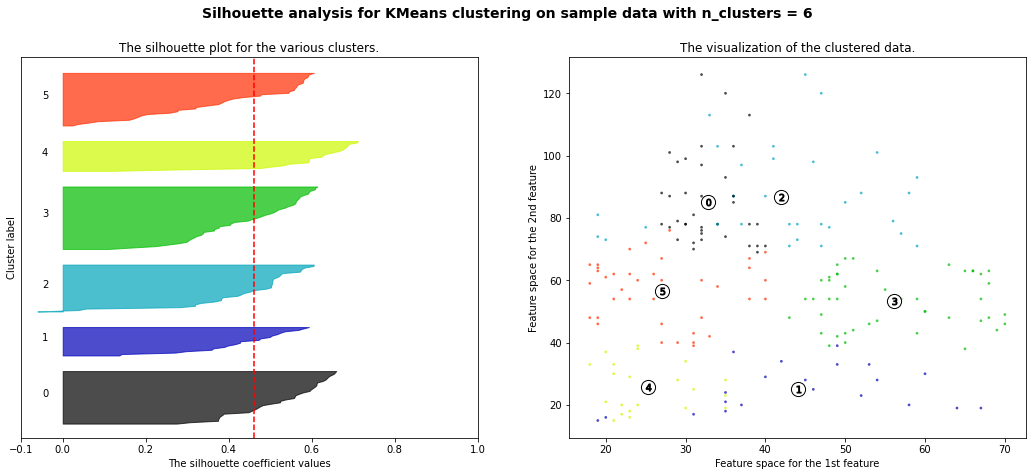

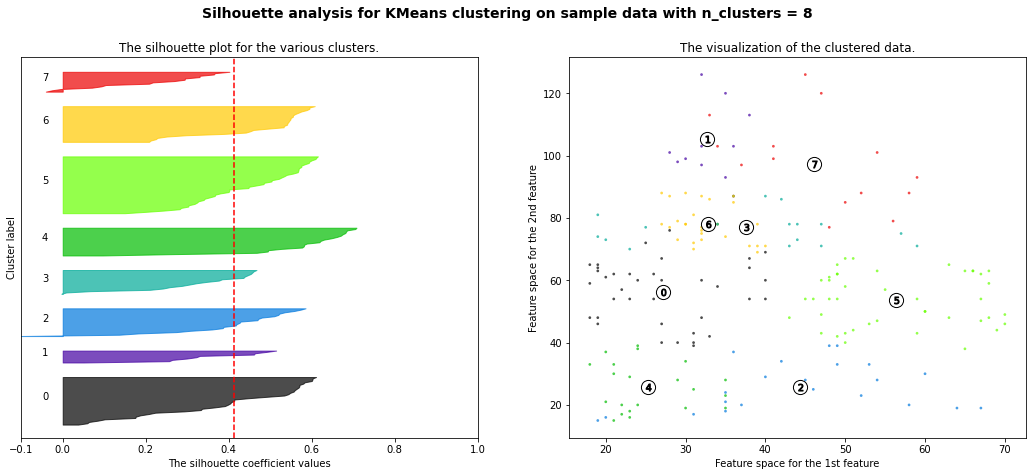

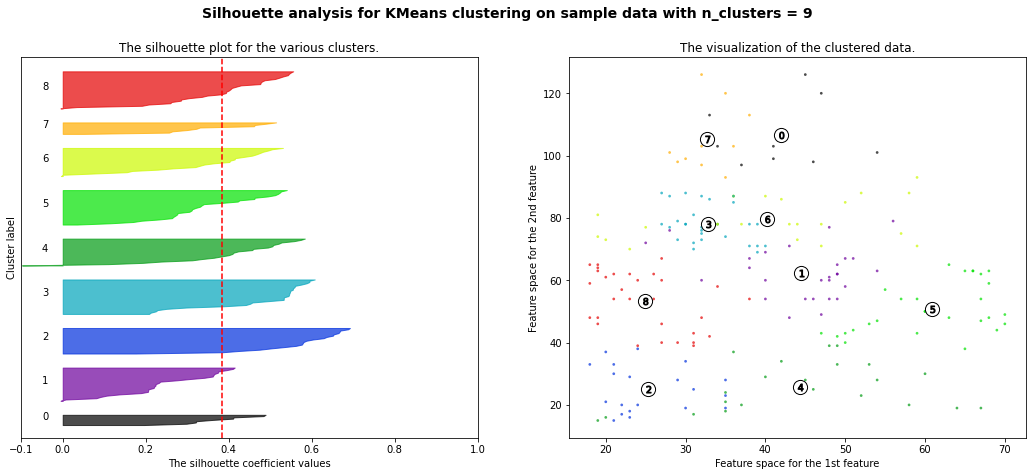

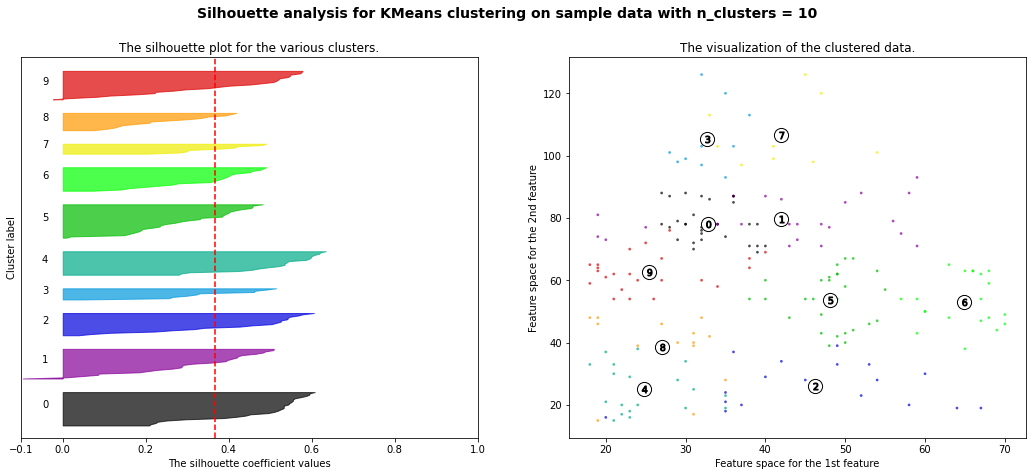

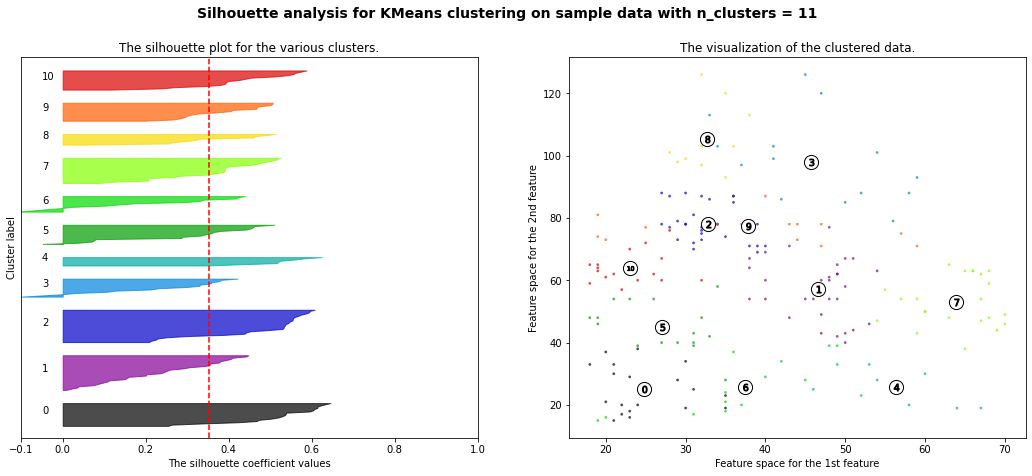

In [45]:
Silhouette(X_data3)

####  Looking at the above graph, we are selecting 6 clusters

In [46]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X_data3)
label

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [47]:
print(kmeans.cluster_centers_)

[[43.08860759 55.29113924 49.56962025]
 [40.91428571 86.34285714 17.57142857]
 [32.76315789 85.21052632 82.10526316]
 [45.2173913  26.30434783 20.91304348]
 [25.52173913 26.30434783 78.56521739]]


In [48]:
X_data3['label'] = label
X_data3.head(5)

Age  Annual Income (k$)  Spending Score (1-100)  label
CustomerID                                                        
1            19                  15                      39      3
2            21                  15                      81      4
3            20                  16                       6      3
4            23                  16                      77      4
5            31                  17                      40      3

#### Normal Scatter 3D Plot 

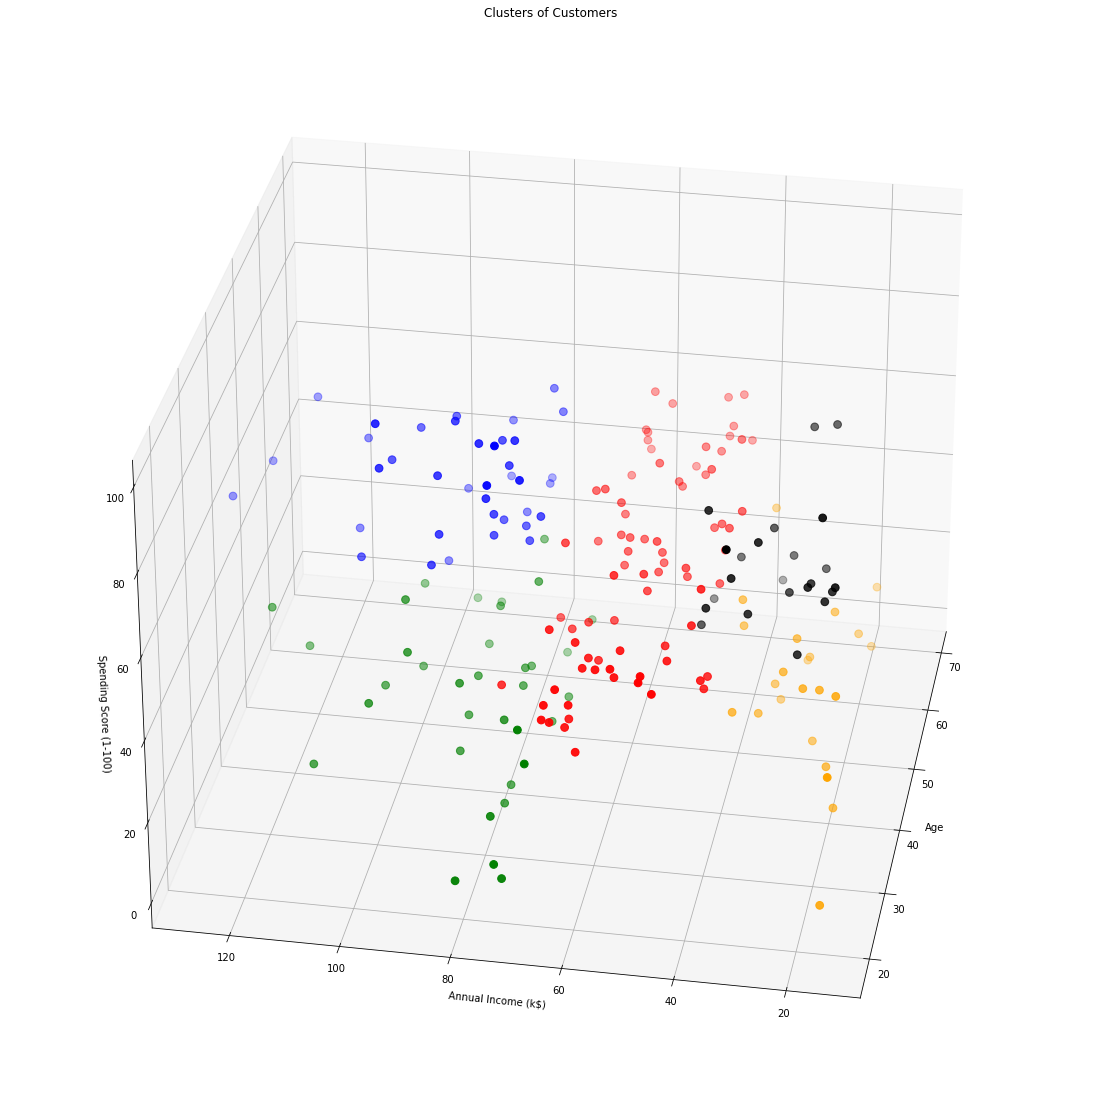

In [50]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_data3.Age[X_data3.label==0],X_data3['Annual Income (k$)'][X_data3.label==0],X_data3['Spending Score (1-100)'][X_data3.label==0], c='red',s=60)
ax.scatter(X_data3.Age[X_data3.label==1],X_data3['Annual Income (k$)'][X_data3.label==1],X_data3['Spending Score (1-100)'][X_data3.label==1], c='green',s=60)
ax.scatter(X_data3.Age[X_data3.label==2],X_data3['Annual Income (k$)'][X_data3.label==2],X_data3['Spending Score (1-100)'][X_data3.label==2], c='blue',s=60)
ax.scatter(X_data3.Age[X_data3.label==3],X_data3['Annual Income (k$)'][X_data3.label==3],X_data3['Spending Score (1-100)'][X_data3.label==3], c='orange',s=60)
ax.scatter(X_data3.Age[X_data3.label==4],X_data3['Annual Income (k$)'][X_data3.label==4],X_data3['Spending Score (1-100)'][X_data3.label==4], c='black',s=60)
ax.view_init(30,190)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Clusters of Customers')

plt.show()

#### Using plotly we are trying to draw a Scatter 3D plot 

In [51]:
import plotly.express as px
fig = px.scatter_3d(X_data3, x='Age' , y='Spending Score (1-100)' ,z='Annual Income (k$)',
                    color='label')
fig.show()